In [1]:
import pandas as pd

df = pd.read_csv('chatGPT_news_dataset-complete-list4.csv')
# df.columns = ['Title', 'Source','Link','Date','Country','TLD','URL','Text','Keywords','Sentiment']
df.head()

C:\Users\a_jaw\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\a_jaw\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Title Source  \
0  Telstra CEO Vicki Brady 'excited' about future...  9News   
1  Vanderbilt University apologises for using Cha...  9News   
2  ChatGPT writes two HSC English essays and teac...  9News   
3  ChatGPT: How artificial intelligence could imp...  9News   
4  Microsoft revamps Bing with AI tech more power...  9News   

                                                Link  \
0  https://news.google.com/rss/articles/CBMigAFod...   
1  https://news.google.com/rss/articles/CBMikgFod...   
2  https://news.google.com/rss/articles/CBMisQFod...   
3  https://news.google.com/rss/articles/CBMioAFod...   
4  https://news.google.com/rss/articles/CBMipQFod...   

                            Date Country  TLD           URL  \
0  Tue, 28 Feb 2023 08:00:00 GMT     USA  com  9news.com.au   
1  Thu, 23 Feb 2023 08:00:00 GMT     USA  com  9news.com.au   
2  Wed, 01 Feb 2023 08:00:00 GMT     USA  com  9news.com.au   
3  Tue, 14 Feb 2023 08:00:00 GMT     USA  com  9news.com.au   
4  Wed, 08 Feb 2023 08:00:00 GMT     USA  com  9news.com.au   

                                                text  \
0  Since launching late last year ChatGPT has bee...   
1  Last Friday; the Tennessee-based school emaile...   
2  A﻿s children go back to class; and university ...   
3  ﻿Since it was made available in late November;...   
4  Microsoft has announced a revamp of its Bing s...   

                                            Keywords Sentiment  
0  thats;brady;chatgpt;really;telstra;workforce;w...  Positive  
1  email;student;write;vanderbilt;chatgpt;tragedy...  Negative  
2  bot;chatgpt;mark;essays;english;gives;students...  Positive  
3  outflank;late;cheat;chatgpt;relationships;stud...  Positive  
4  tech;google;chatgpt;revamps;search;ai;bing;pow...  Positive

In [2]:
df.describe()


Title  Source  \
count                                                2589    2589   
unique                                               2589     317   
top     Telstra CEO Vicki Brady 'excited' about future...  msnNOW   
freq                                                    1      98   

                                                     Link  \
count                                                2589   
unique                                               2589   
top     https://news.google.com/rss/articles/CBMigAFod...   
freq                                                    1   

                                 Date Country   TLD           URL  \
count                            2589    2589  2589          2589   
unique                            558       1     1           283   
top     Tue, 07 Feb 2023 08:00:00 GMT     USA   com  livemint.com   
freq                              105    2589  2589           100   

                                                     text  \
count                                                2576   
unique                                               2504   
top     Country  United States of America US Virgin Is...   
freq                                                   30   

                                                 Keywords Sentiment  
count                                                2589      2589  
unique                                               2541         3  
top     bot;search;launch;source;technology;person;ope...  Positive  
freq                                                    4      2364

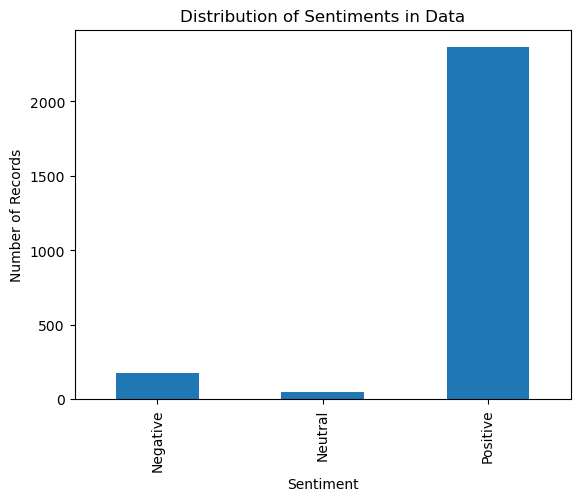

In [3]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby('Sentiment')['Title'].count()

fig, ax = plt.subplots()
sentiment_counts.plot(kind='bar', ax=ax)

# Add chart labels
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Records')
ax.set_title('Distribution of Sentiments in Data')

# Display the chart
plt.show()


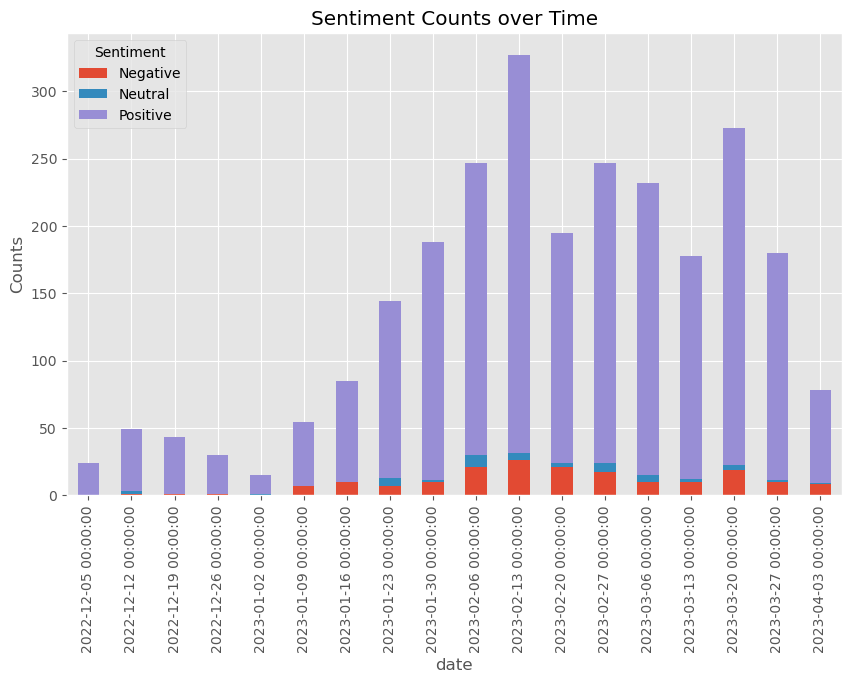

In [4]:
df['date'] = pd.to_datetime(df['Date'])

df_weekly_sentiment = df.groupby([pd.Grouper(key='date', freq='W-MON'), 'Sentiment']).size().reset_index(name='counts')
df['date'] = df['date'].dt.date
df_pivot = df_weekly_sentiment.pivot(index='date', columns='Sentiment', values='counts')
df_pivot = df_pivot.fillna(0)

plt.style.use('ggplot')
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Counts')
ax.set_title('Sentiment Counts over Time')

plt.show()


In [5]:
import tldextract

import country_converter as coco

TLDs =['edu','org','net','com','gov']
# define a function to extract country from url
def extract_country(url):
    cc = coco.CountryConverter()
    ext = tldextract.extract(url)
    try:
        c = ext.suffix.split('.')[-1]
    except:
        c = 'USA'
    if c in TLDs:
            c='USA'
    else:
        c = cc.convert(names = c, to = 'name_short')
    return c

df['Country'] = df['URL'].apply(extract_country)

df.head()


Title Source  \
0  Telstra CEO Vicki Brady 'excited' about future...  9News   
1  Vanderbilt University apologises for using Cha...  9News   
2  ChatGPT writes two HSC English essays and teac...  9News   
3  ChatGPT: How artificial intelligence could imp...  9News   
4  Microsoft revamps Bing with AI tech more power...  9News   

                                                Link  \
0  https://news.google.com/rss/articles/CBMigAFod...   
1  https://news.google.com/rss/articles/CBMikgFod...   
2  https://news.google.com/rss/articles/CBMisQFod...   
3  https://news.google.com/rss/articles/CBMioAFod...   
4  https://news.google.com/rss/articles/CBMipQFod...   

                            Date    Country  TLD           URL  \
0  Tue, 28 Feb 2023 08:00:00 GMT  Australia  com  9news.com.au   
1  Thu, 23 Feb 2023 08:00:00 GMT  Australia  com  9news.com.au   
2  Wed, 01 Feb 2023 08:00:00 GMT  Australia  com  9news.com.au   
3  Tue, 14 Feb 2023 08:00:00 GMT  Australia  com  9news.com.au   
4  Wed, 08 Feb 2023 08:00:00 GMT  Australia  com  9news.com.au   

                                                text  \
0  Since launching late last year ChatGPT has bee...   
1  Last Friday; the Tennessee-based school emaile...   
2  A﻿s children go back to class; and university ...   
3  ﻿Since it was made available in late November;...   
4  Microsoft has announced a revamp of its Bing s...   

                                            Keywords Sentiment        date  
0  thats;brady;chatgpt;really;telstra;workforce;w...  Positive  2023-02-28  
1  email;student;write;vanderbilt;chatgpt;tragedy...  Negative  2023-02-23  
2  bot;chatgpt;mark;essays;english;gives;students...  Positive  2023-02-01  
3  outflank;late;cheat;chatgpt;relationships;stud...  Positive  2023-02-14  
4  tech;google;chatgpt;revamps;search;ai;bing;pow...  Positive  2023-02-08

In [6]:
df1=df[df['Sentiment']=='Positive']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec=dict(ngram_range=(1,1),min_df=10)
vect=CountVectorizer(**vec)
x=vect.fit_transform(df1['Keywords']) #tokenizer=lambda x: x.split(',')
k=pd.DataFrame(x.toarray(),columns=vect.get_feature_names_out())
k.head()

100  20  2023  ability  able  academic  academics  access  according  ad  \
0    0   0     0        0     0         0          0       0          0   0   
1    0   0     0        0     0         0          0       0          0   0   
2    0   0     0        0     0         0          0       0          0   0   
3    0   0     0        0     0         0          0       0          0   0   
4    0   0     0        0     0         0          0       1          0   0   

   ...  writer  writers  writes  writing  written  wrong  wrote  yes  york  \
0  ...       0        0       0        0        0      0      0    0     0   
1  ...       0        0       1        0        0      0      0    0     0   
2  ...       0        0       0        0        0      0      0    0     0   
3  ...       0        0       0        0        0      0      0    0     0   
4  ...       0        0       0        0        0      0      0    0     0   

   youre  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 567 columns]

In [8]:
import numpy as np
for x in k.columns:
    print(x,np.count_nonzero(k[x]))

100 10
20 21
2023 15
ability 23
able 21
academic 40
academics 12
access 92
according 17
ad 12
add 11
adds 10
age 10
ai 1387
aigenerated 21
aipowered 14
ais 11
aiwritten 15
altman 32
amazon 12
amid 20
announced 17
announces 16
answer 60
answers 55
api 16
app 71
apple 22
apps 20
article 11
artificial 125
ask 30
asked 82
asks 15
assessment 13
assignments 11
assistant 14
author 11
authors 14
available 28
azure 16
baidu 58
baidus 11
ban 26
banned 10
bans 11
bard 80
based 14
best 33
better 29
bias 18
biden 13
big 30
bill 21
billion 55
billions 20
bing 85
book 17
books 10
bot 156
breaking 12
browser 15
business 59
businesses 12
called 19
cant 19
car 11
cent 17
ceo 43
change 46
changing 12
chat 46
chatbot 380
chatbots 62
chatgpt 2180
chatgpt4 16
chatgptlike 54
chatgptpowered 22
chatgpts 66
chatgptstyle 35
cheat 10
cheating 33
check 16
chief 13
china 46
chinas 52
chinese 83
chrome 12
city 10
claims 14
class 17
classroom 14
climate 10
cloud 16
code 45
college 28
coming 32
commentary 11
companies

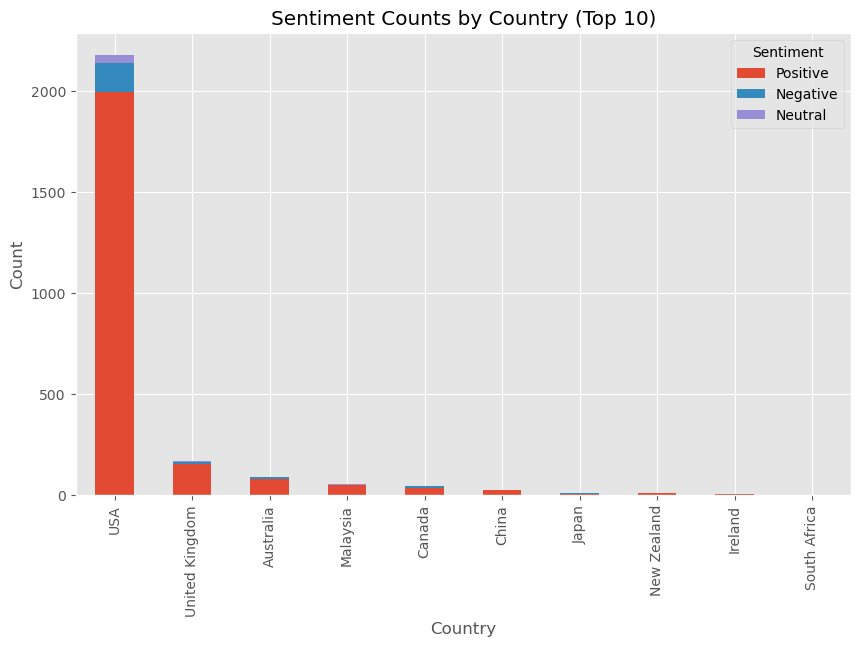

In [9]:
counts = df.groupby(['Country', 'Sentiment']).size().reset_index(name='Count')
pivot_counts = counts.pivot(index='Country', columns='Sentiment', values='Count')

# Sort by the total count of sentiments
pivot_counts['Total'] = pivot_counts.sum(axis=1)
pivot_counts = pivot_counts.sort_values(by='Total', ascending=False)

# Plot the top 10 countries
top10 = pivot_counts[:20]
top10[['Positive', 'Negative','Neutral']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Sentiment Counts by Country (Top 10)')
plt.show()

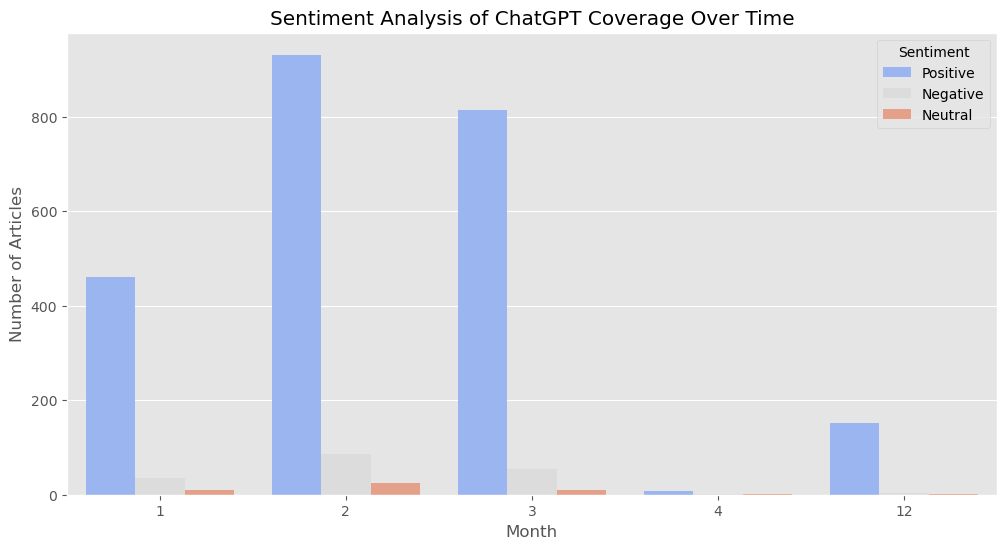

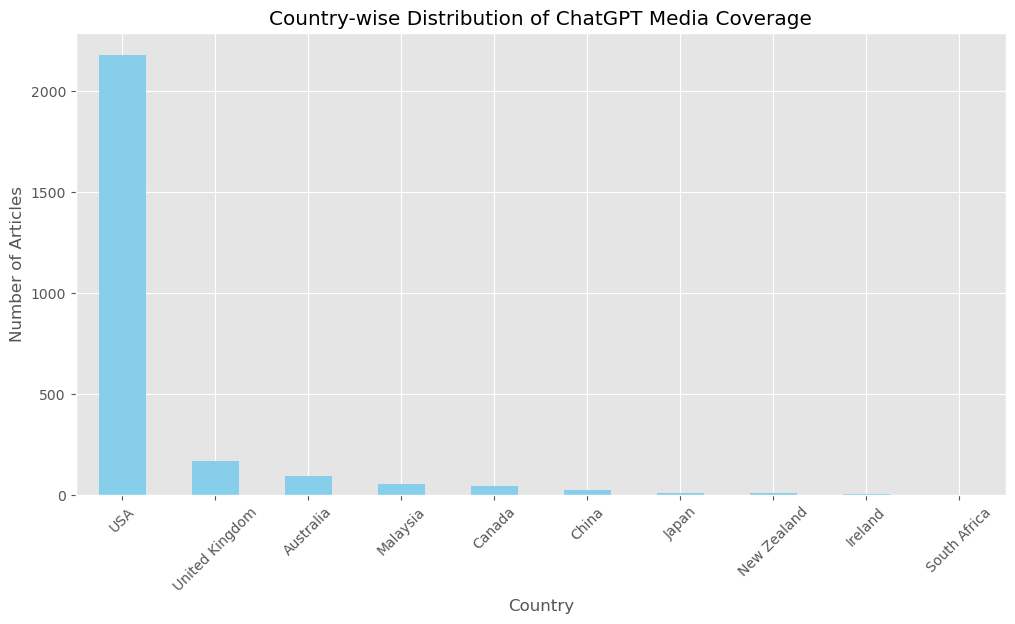

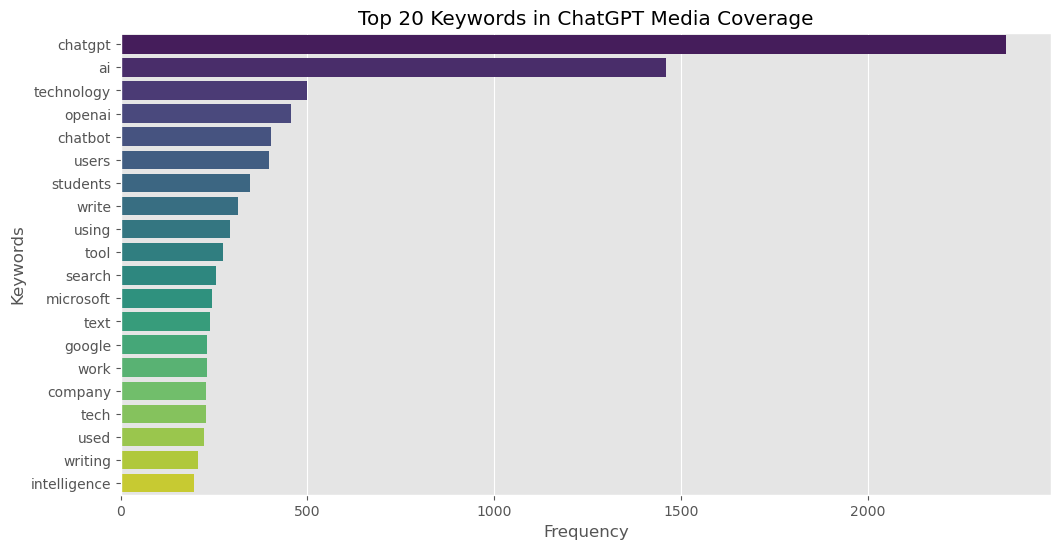

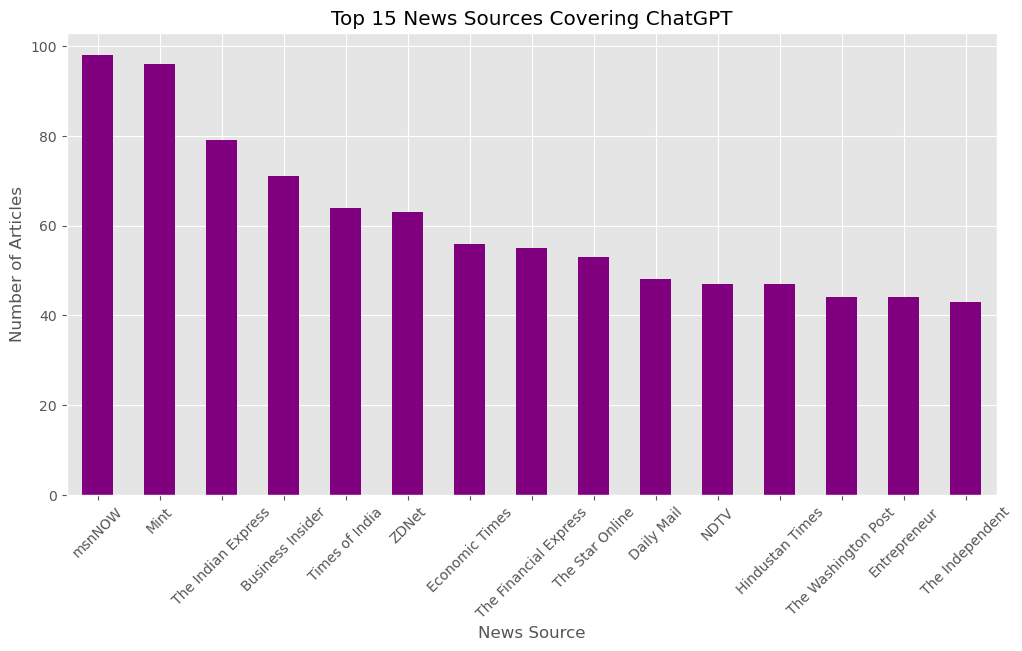

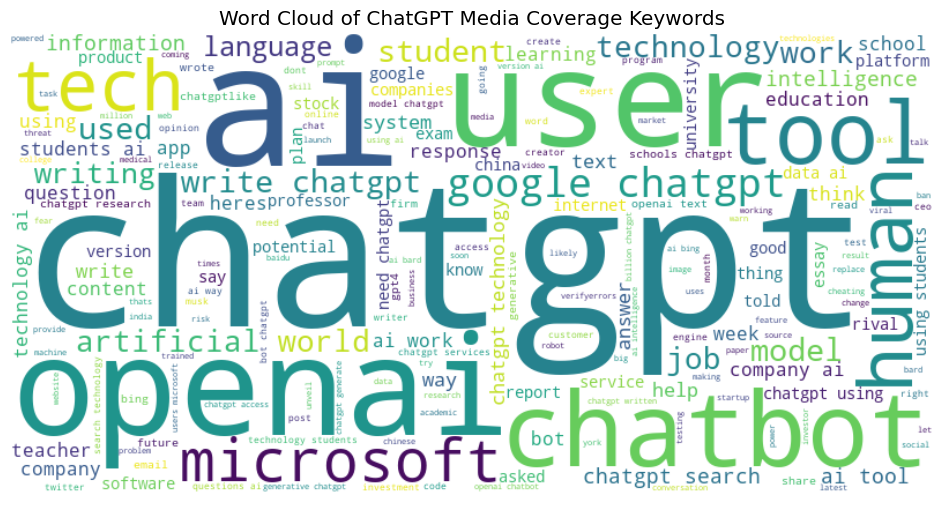

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset (assuming it is stored as a CSV file)
#df = pd.read_csv('chatgpt_news_data.csv')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sentiment Analysis Over Time
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=df['date'].dt.month, hue='Sentiment', palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Sentiment Analysis of ChatGPT Coverage Over Time')
plt.legend(title='Sentiment')
plt.show()

# Country-wise Distribution
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.title('Country-wise Distribution of ChatGPT Media Coverage')
plt.xticks(rotation=45)
plt.show()

# Keyword Frequency Visualization
all_keywords = ';'.join(df['Keywords'].dropna()).split(';')
keyword_freq = pd.Series(all_keywords).value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_freq.values, y=keyword_freq.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords in ChatGPT Media Coverage')
plt.show()

# Source Distribution
plt.figure(figsize=(12, 6))
df['Source'].value_counts().head(15).plot(kind='bar', color='purple')
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.title('Top 15 News Sources Covering ChatGPT')
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_keywords))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of ChatGPT Media Coverage Keywords')
plt.show()


<Figure size 1200x600 with 0 Axes>

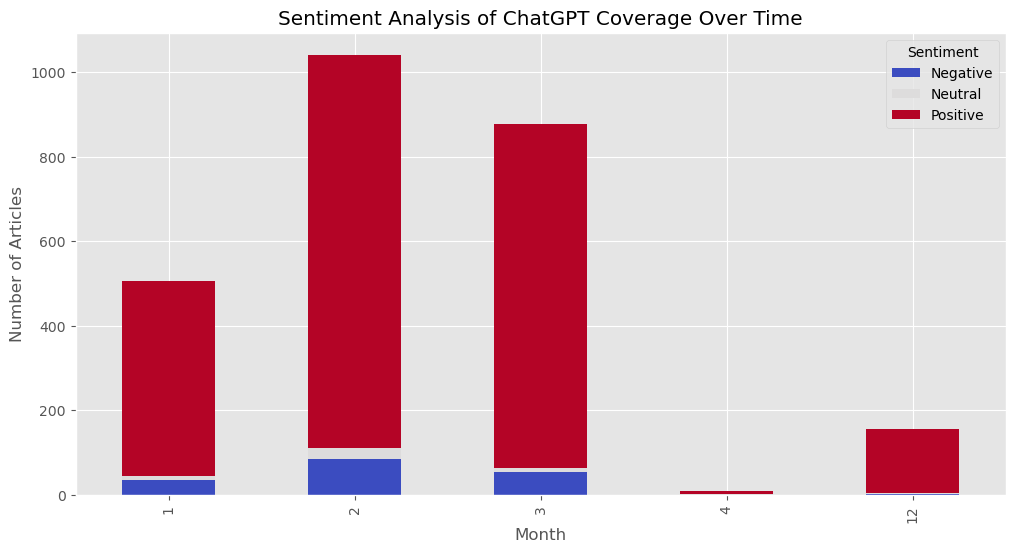

<Figure size 1200x600 with 0 Axes>

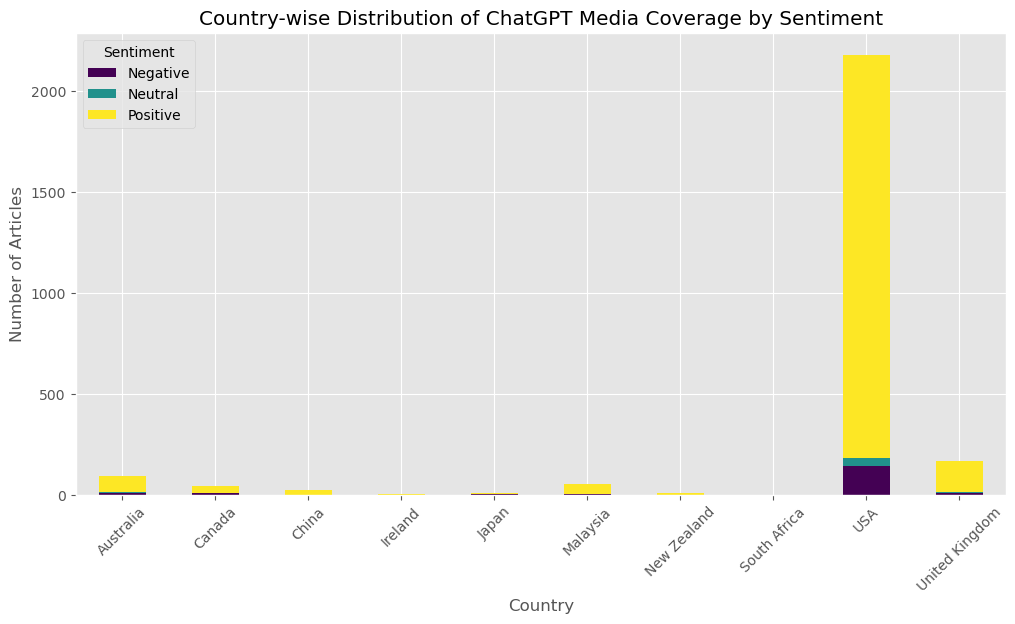

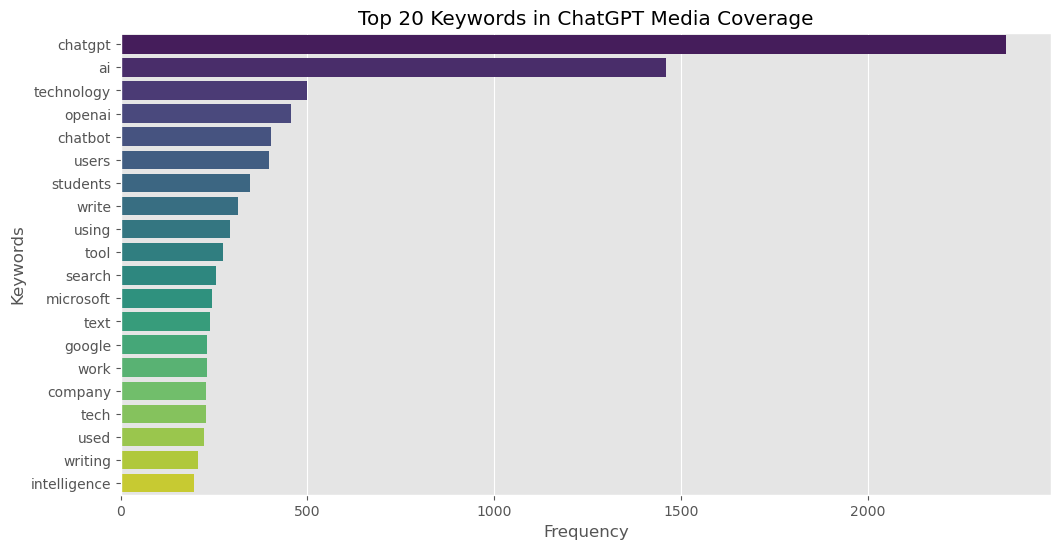

<Figure size 1200x600 with 0 Axes>

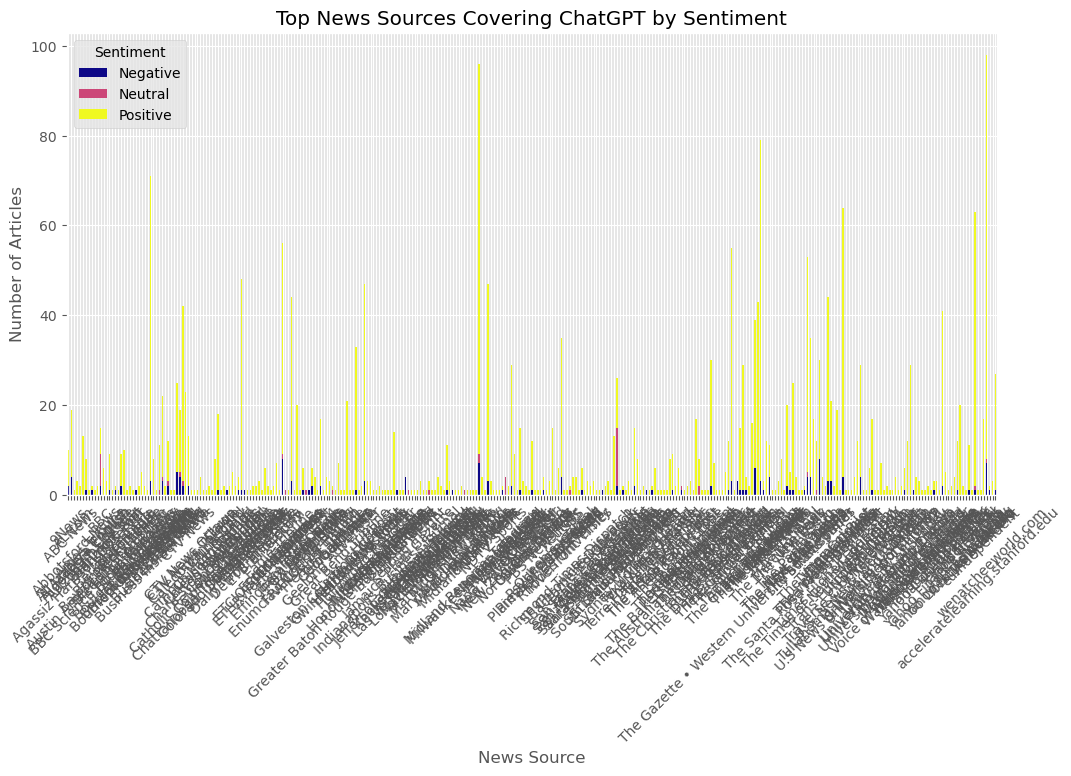

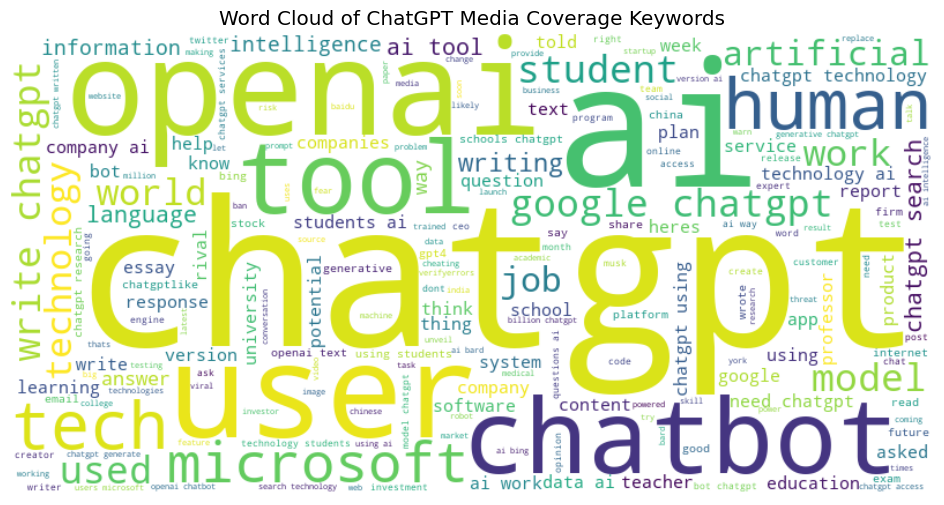

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset (assuming it is stored as a CSV file)
#df = pd.read_csv('chatgpt_news_data.csv')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sentiment Analysis Over Time with Groupby
sentiment_trend = df.groupby([df['date'].dt.month, 'Sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Sentiment Analysis of ChatGPT Coverage Over Time')
plt.legend(title='Sentiment')
plt.show()

# Country-wise Distribution with Sentiment
country_sentiment = df.groupby(['Country', 'Sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
country_sentiment.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.title('Country-wise Distribution of ChatGPT Media Coverage by Sentiment')
plt.xticks(rotation=45)
plt.show()

# Keyword Frequency Visualization
all_keywords = ';'.join(df['Keywords'].dropna()).split(';')
keyword_freq = pd.Series(all_keywords).value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_freq.values, y=keyword_freq.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords in ChatGPT Media Coverage')
plt.show()

# Source Distribution with Sentiment
df_source_sentiment = df.groupby(['Source', 'Sentiment']).size().unstack()
plt.figure(figsize=(12, 6))
df_source_sentiment.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12,6))
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.title('Top News Sources Covering ChatGPT by Sentiment')
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_keywords))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of ChatGPT Media Coverage Keywords')
plt.show()


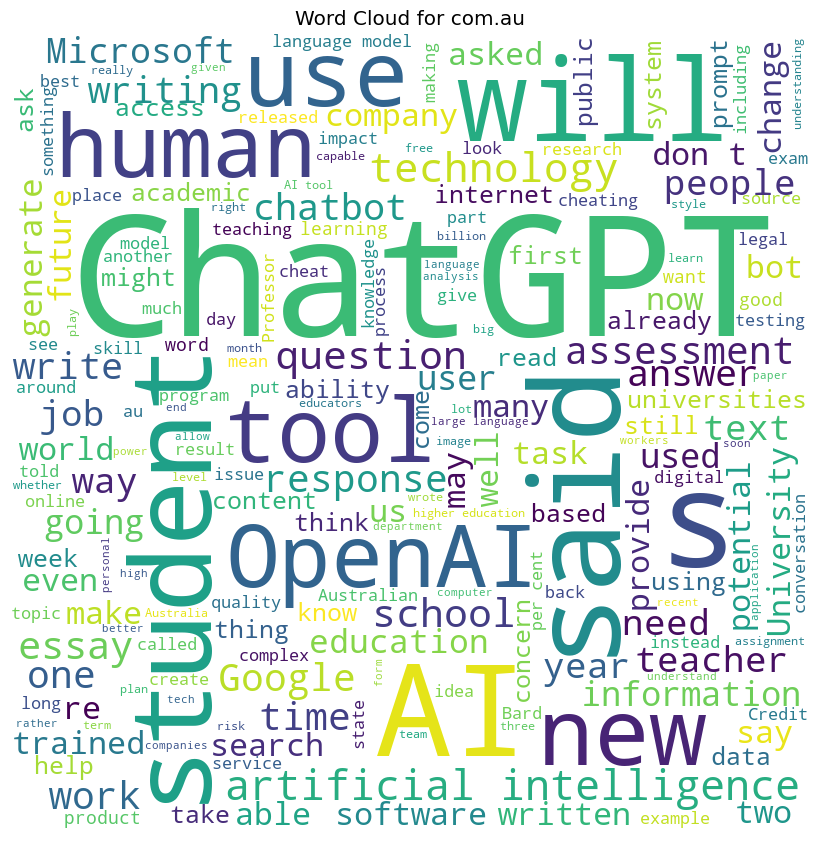

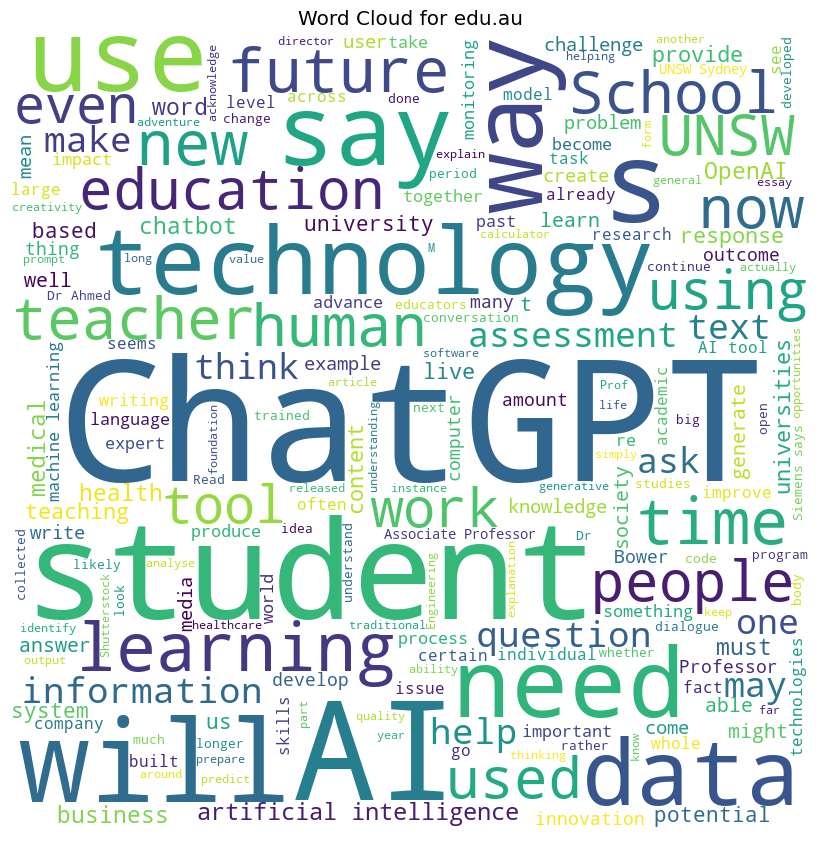

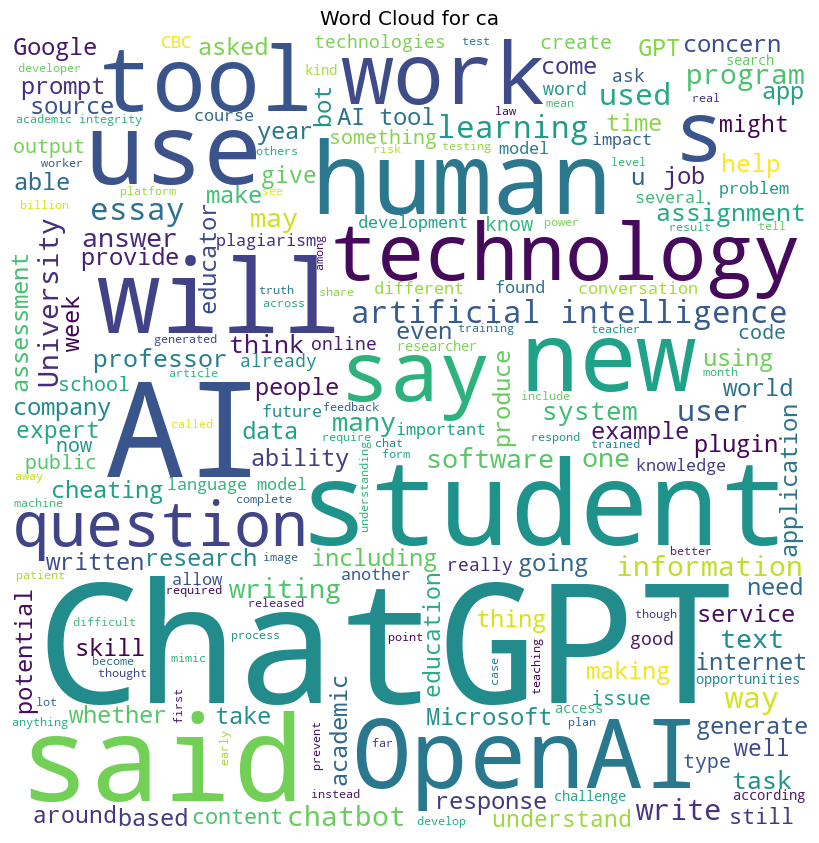

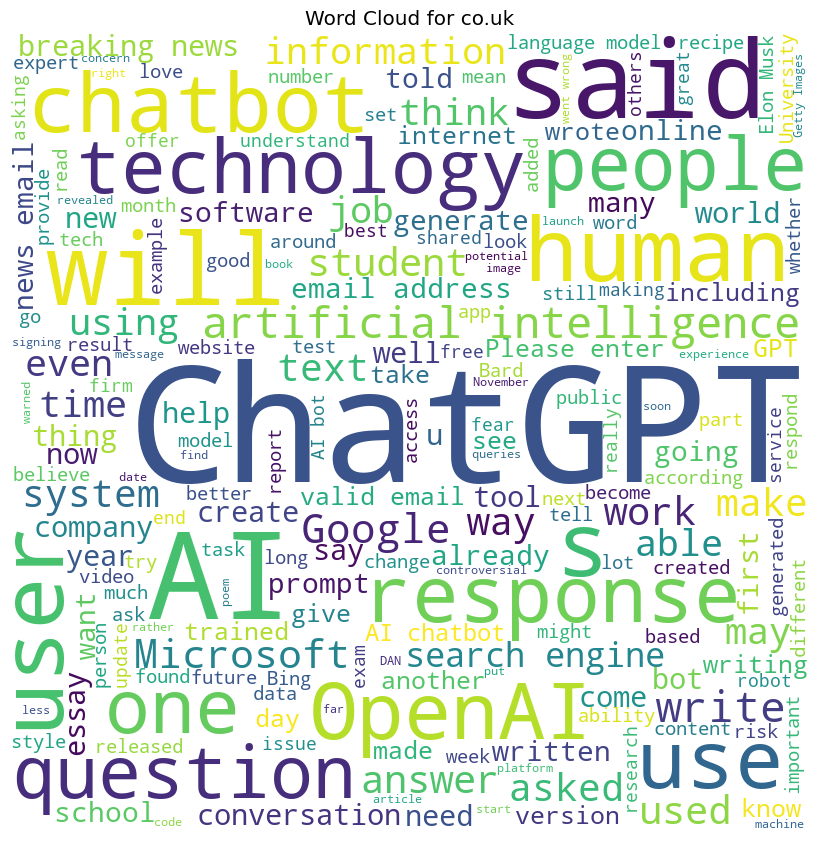

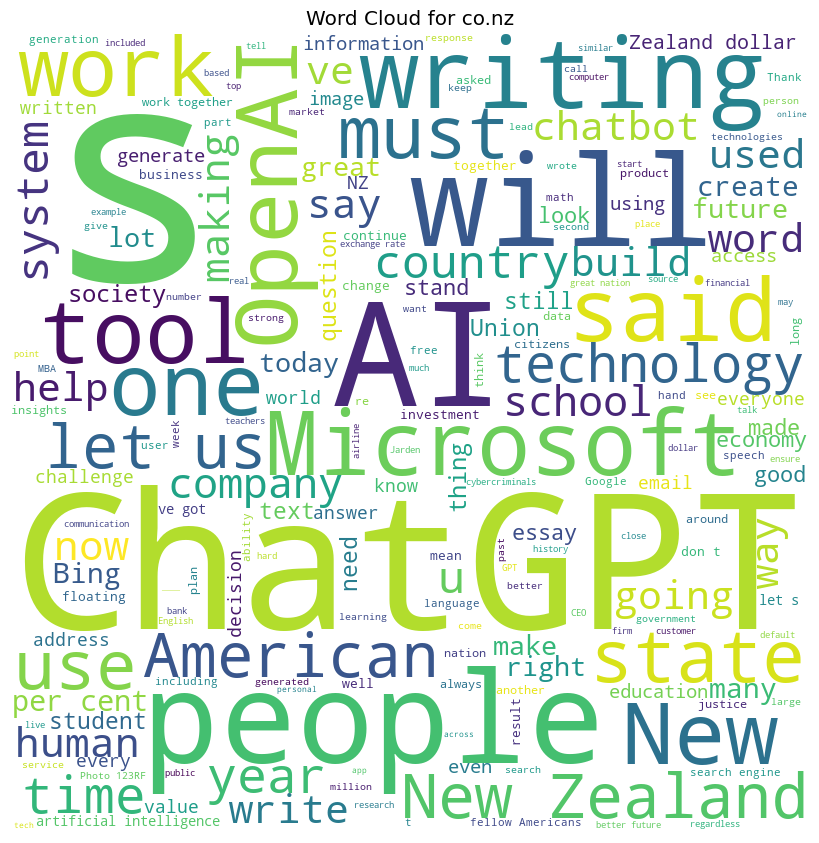

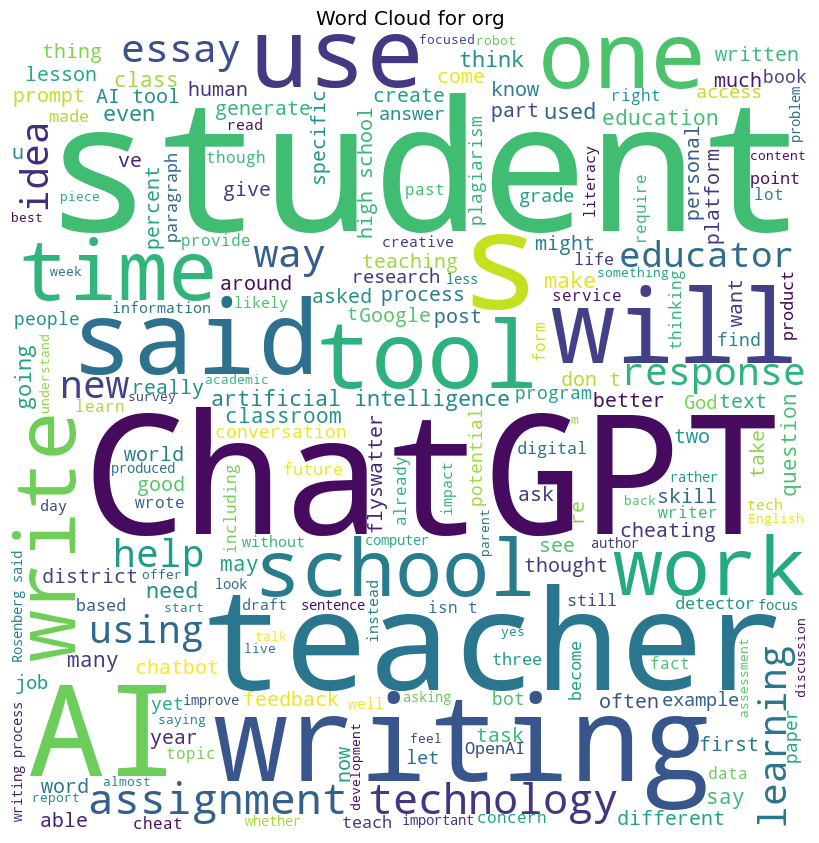

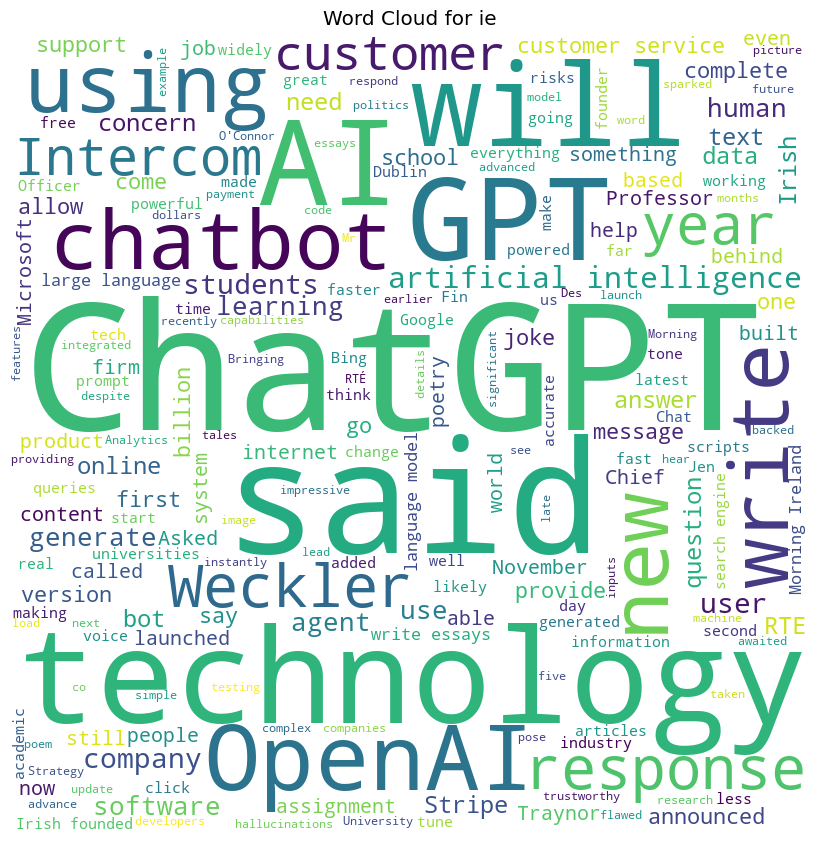

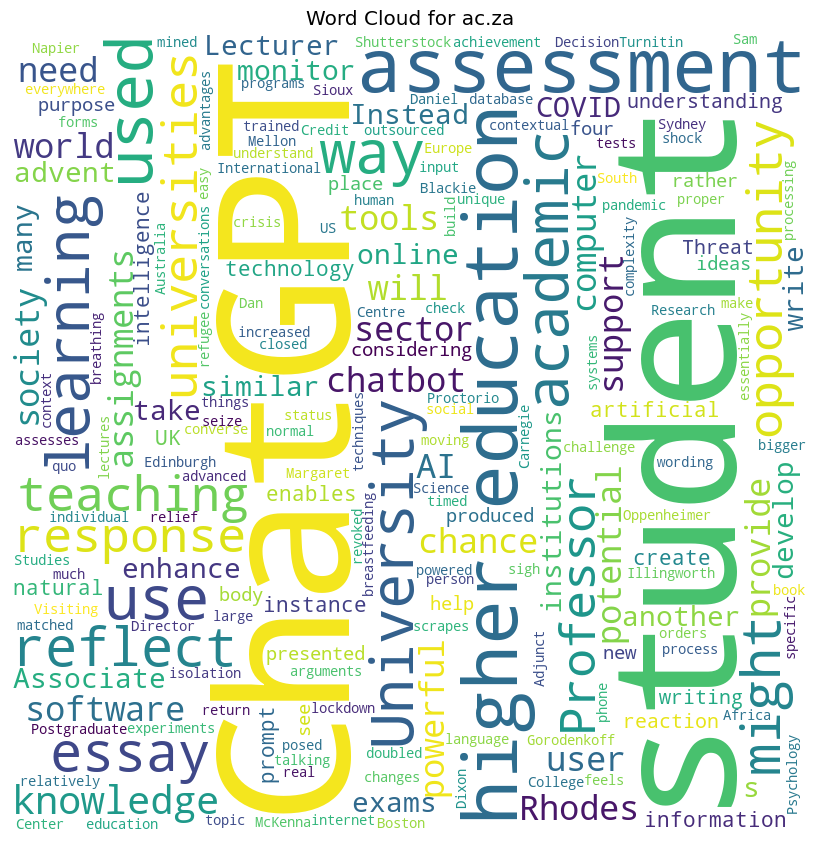

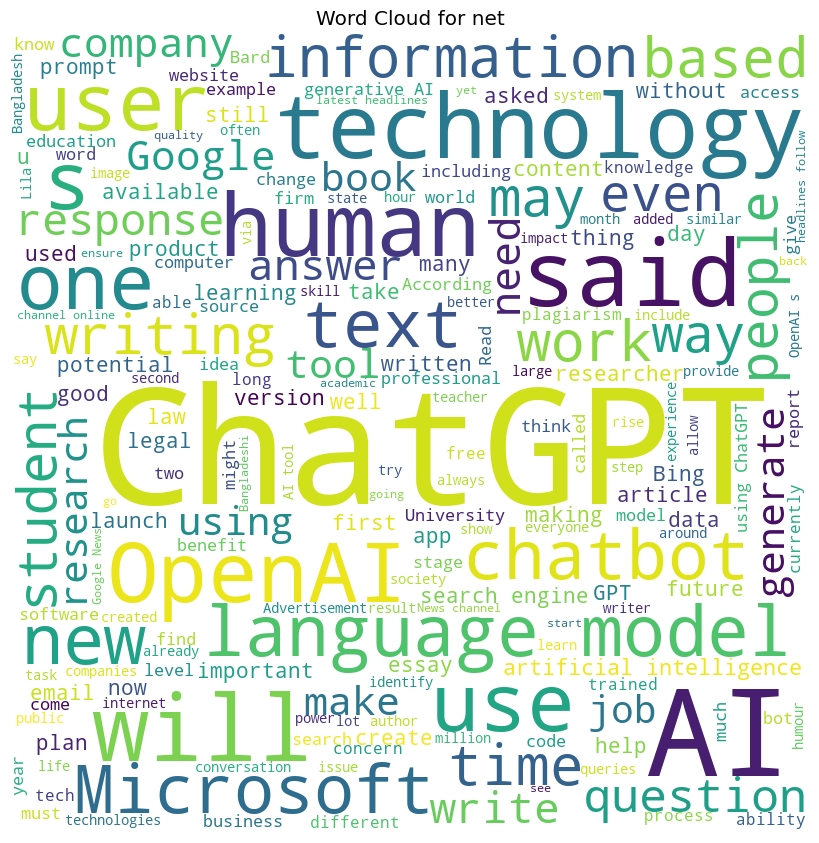

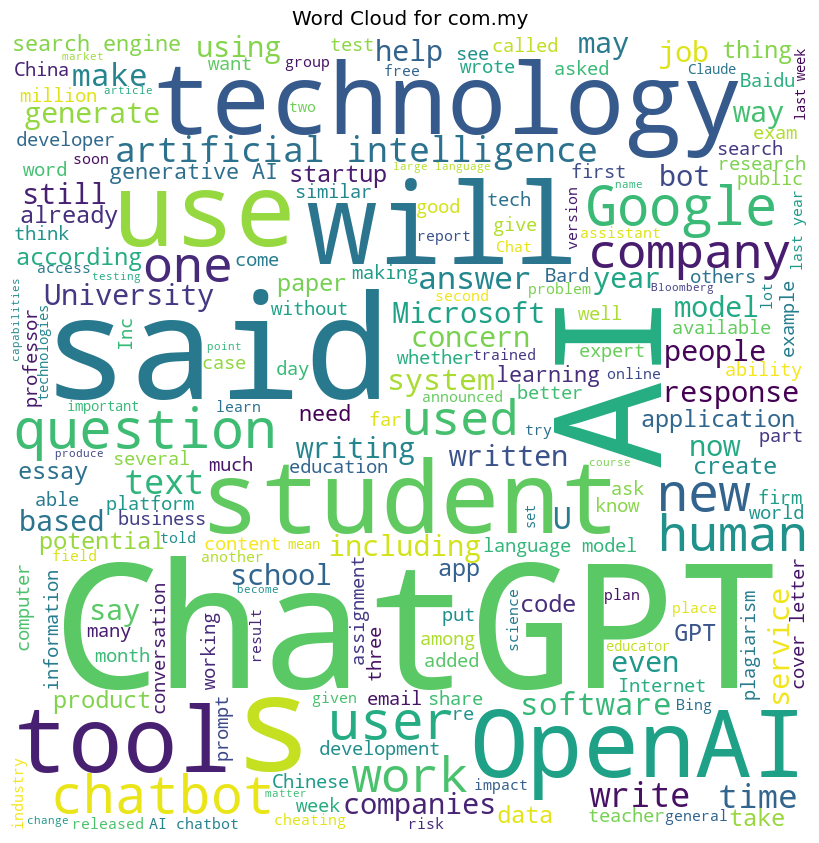

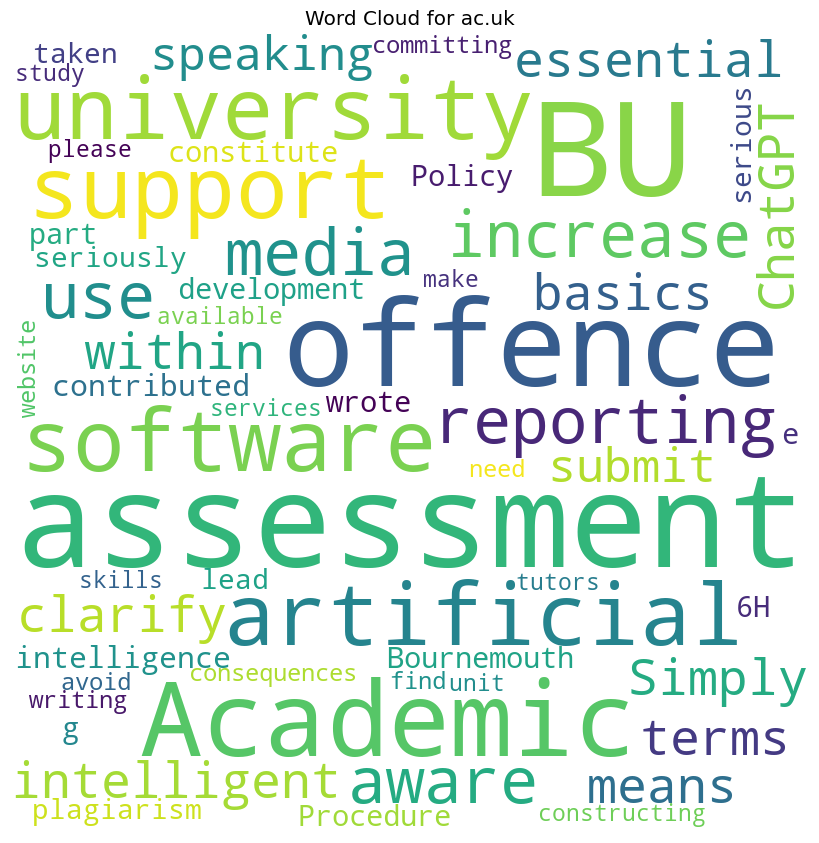

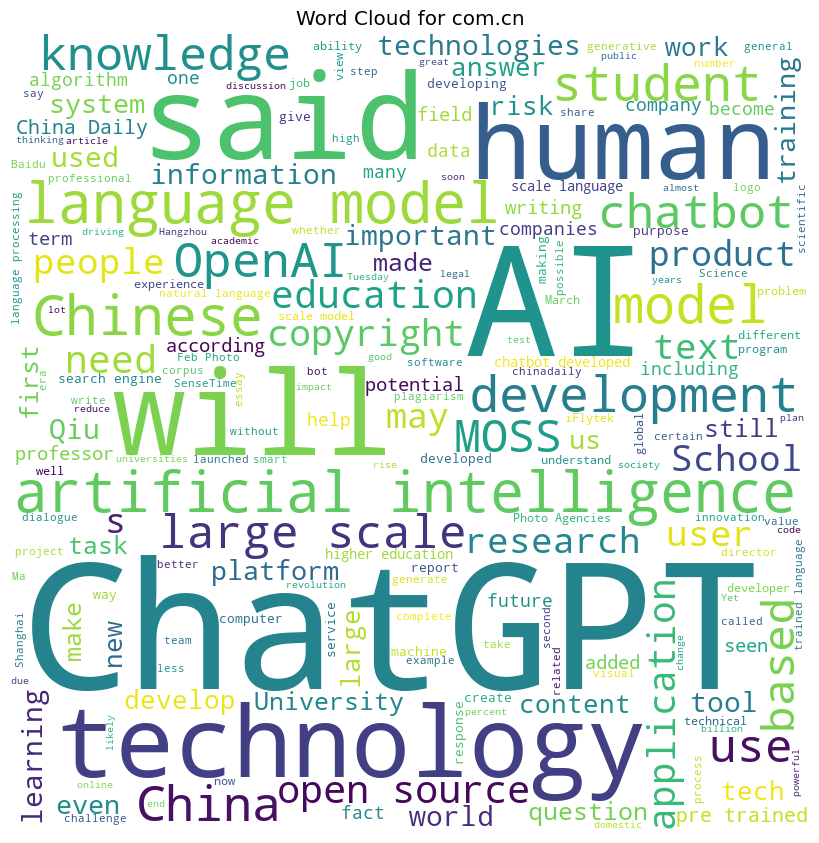

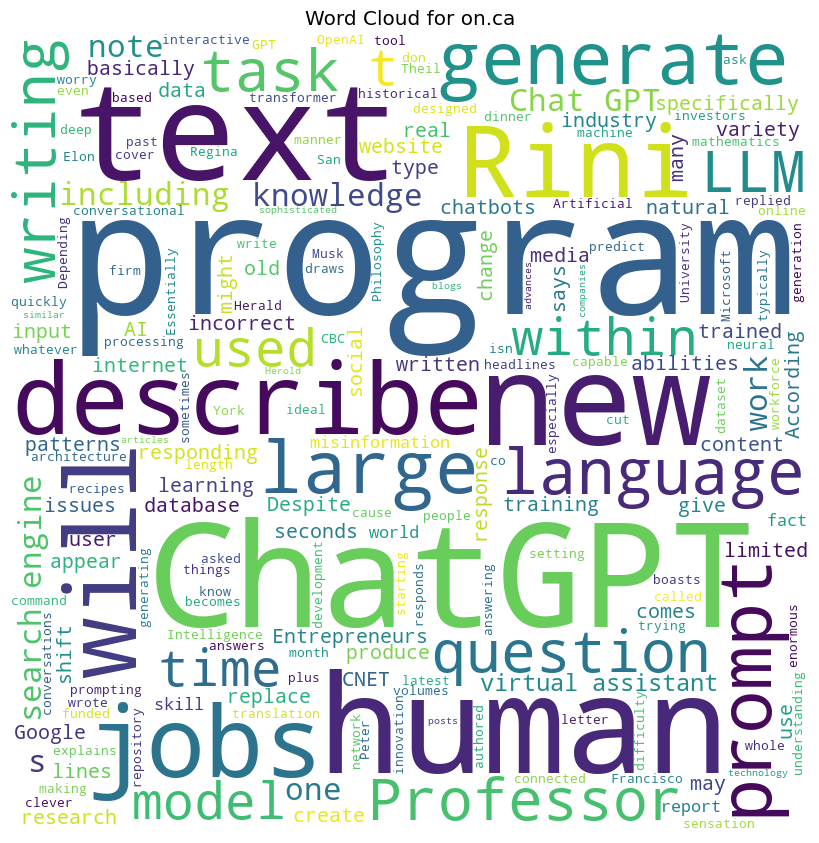

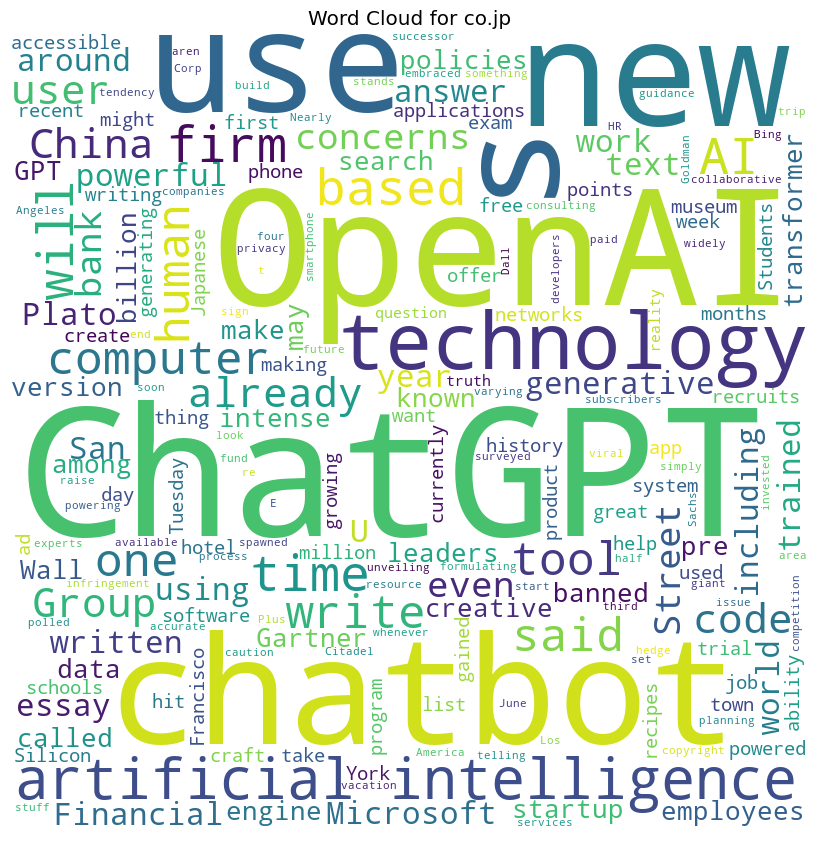

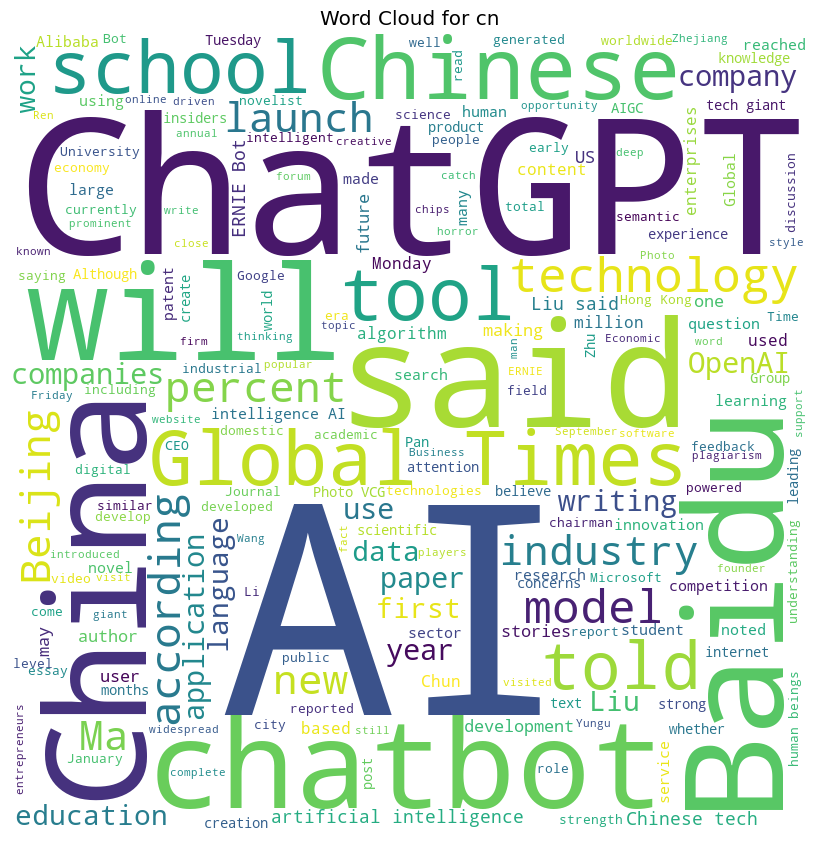

In [10]:
import tldextract
from wordcloud import WordCloud

# extract TLDs from the URLs
df['tld'] = df['URL'].apply(lambda x: tldextract.extract(x).suffix)

# create a dictionary to store the text for each TLD
tld_text = {}
for tld in df['tld'].unique():
    try:
        tld_text[tld] = ' '.join(df[df['tld']==tld]['text'].tolist())
    except:
        continue
# generate wordcloud for each TLD
for tld in tld_text.keys():
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(tld_text[tld])
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud for {tld}")
    plt.show()


In [51]:

# from wordcloud import WordCloud
# import pandas as pd

# if len(domain.split('.')[-1]) == 2:
#     df['TLD'] = df['URL'].str.split('.').str[-2]
# else:
#     df['TLD'] = df['URL'].str.split('.').str[-1]

# # concatenate all the text fields into a single string
# text = ' '.join(str(df['text']).replace('\n', ''))

# # generate the word cloud
# wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# # plot the word cloud for each TLD
# for tld in df['TLD'].unique():
#     filtered_text = ' '.join(str(df[df['TLD'] == tld]['text']).replace('\n', ''))
#     filtered_wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(filtered_text)
#     plt.figure(figsize=(8, 8), facecolor=None)
#     plt.imshow(filtered_wordcloud)
#     plt.axis("off")
#     plt.tight_layout(pad=0)
#     plt.show()



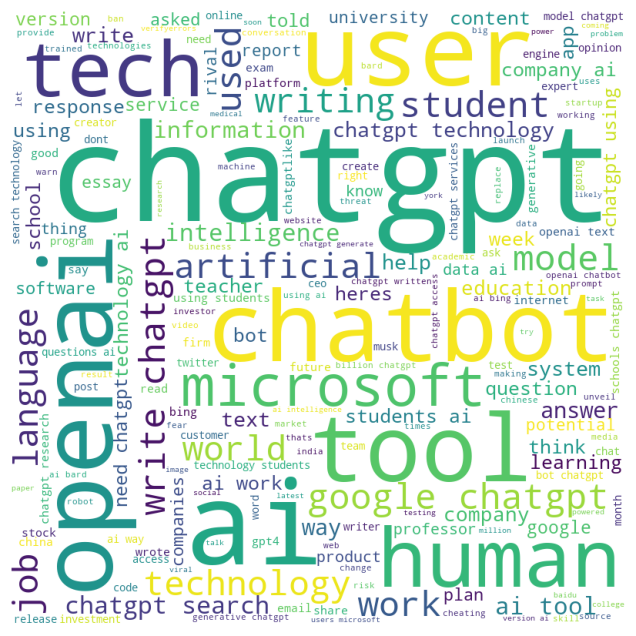

In [52]:
text = ' '.join(df['Keywords'].dropna().values)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()